![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)

# Working With Open Data Part 3 - The Lottery

## Introduction
This notebook demonstrates some more complex data manipulation skills. This time, we will be using a data set of the historical winning lottery numbers. 



## The Data Set

We'll be using historical Lotto 649 data that is hosted on the Lotto 649 website [at this link](http://www.lotto649stats.com/recent_winning.html). Should you choose to follow that link, you'll find yourself greeted by a table that looks like the one below 

![winning lottery numbers](images/lotto.png)

Which is fantastic, there's all the data right there. However, the question remains: how will we extract that data from the website into a format that will work well for us? Another catch, which isn't obvious from the screen shot is that this is an incomplete table. There are several more tables of earlier years available. As this is open data, we're free to go through that website (either manually or with a computer) and copy that data down ourselves. However,, that might take a lot more time than it's worth, so we should be hesitant to start our analysis from here. 

It turns out that someone else has already gone through the trouble of capturing the last 30 or so years worth of data and put it into a form that is easy to work with. This data is available [at this link](https://www.kaggle.com/datascienceai/lottery-dataset). Unfortunately, this is an example of "semi-open data". You're free to download it without restriction, but you have to register for the website to obtain access. Luckily, we've already gone through that trouble for you and we're simply loading a local copy saved separately. Below are a few lines of code that should be starting to look familiar from the previous notebook. 

In [2]:
# Import our data manipulation library
import pandas as pd 
import matplotlib.pyplot as plt
# So any plots we want will appear in the notebook
%matplotlib inline

In [3]:
# Here we're loading the data set, here the 'pd' prefix tells us that 'read_csv' is a method
# coming from the pandas library
lottery = pd.read_csv("data/649.csv")

# This is to show us how many rows in our table we will have, 'len' stands for length
print('Total number of lotteries played:', len(lottery))

# This is to just look at the first five rows of the data set and keep the 
# notebook a little cleaner. 
lottery.head()

Total number of lotteries played: 3665


,PRODUCT,DRAW NUMBER,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
0,649,1,0,6/12/1982,3,11,12,14,41,43,13
1,649,2,0,6/19/1982,8,33,36,37,39,41,9
2,649,3,0,6/26/1982,1,6,23,24,27,39,34
3,649,4,0,7/3/1982,3,9,10,13,20,43,34
4,649,5,0,7/10/1982,5,14,21,31,34,47,45


The above table is the first five rows of our table which has entries for 3665 separate lotteries. That's a lot of prizes! A natural first question to ask of this data is "are some numbers more popular than others?". If there is a bias for some numbers over others, we'd like to play those numbers instead! 

A good way to try that is by counting how many times each number appears. For example, how many 1s, 2s, 3s ... etc have been drawn throughout the life of this data set. Let's walk through the steps that we have to go through. First, let's make a new data table of just the numbers data. 

In [4]:
# First we define a list of the column names (seen in the table above) that we are interested in in order
# to count up their entries. 
cols = ['NUMBER DRAWN 1','NUMBER DRAWN 2','NUMBER DRAWN 3',
        'NUMBER DRAWN 4','NUMBER DRAWN 5','NUMBER DRAWN 6']

# By passing the list we've defined above, we return only those columns. We then assign those columns
# to a new dataframe called 'numbers'
numbers = lottery[cols]

numbers.head()

,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6
0,3,11,12,14,41,43
1,8,33,36,37,39,41
2,1,6,23,24,27,39
3,3,9,10,13,20,43
4,5,14,21,31,34,47


Now that we've isolated the numbers of interest, it's a simple matter of counting all the occurrences of each number. Before we can do that, we have to first introduce another piece of Python/pandas functionality: the `apply()` function. 

---
### Digression: Understanding Apply()

Apply is a function within python/pandas which allows you to "apply" another function or transformation to a large amount of data easily at once. In our case, think of it as a tool that we're using to manipulate all the data in our frame at once. Below we work through an example of how apply works by showing how we can use it to do something deceptively simple: add one to each entry of a data frame.  

In [5]:
'''
Here we're creating a new dataframe and filling it with zeroes. 

The first argument is the values to fill (here just zero everywhere) 
index is a list of labels for the row indexes, here just zero through five,
and columns is the column names, again zero through five 
'''

example = pd.DataFrame(0, index=[0,1,2,3,4,5], columns=[0,1,2,3,4,5])
example

,0,1,2,3,4,5
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0


In [6]:
'''
Now we're going through defining a function, a process which we need to introduce. 

1. Here the 'def' keyword can be thought of to mean "define"

2. 'add_one' is the name we've given to the function that we're defining. This choice is 
    arbitrary and we could have named it anything we wanted. However, it's often helpful 
    to name a function in a way that is meaningful to help describe the purpose of the function.
    
3. 'x' in parenthesis is the name we're assigning to the variable that our function will be 
   taking as input 
   
4. output is the name that we're giving to a variable internal to our function to make calculations

5. return is the keyword that tells our function to return that value once it's been called

6. Notice the consistent indentation after 'def', this is how python knows that the lines of code 
   underneath def are a part of the function 


'''

# This function will take a number x as input, and return that value plus one 
def add_one(x):
    output = x + 1
    return output

# Here we're testing it for expected behavior: Does it indeed 
# return the original number plus one? 
add_one(10)

11

Now that we've defined a "test" dataframe and a function which will add one to any input, we will demonstrate what the `apply()` method will do to a dataframe. 

In [9]:
'''
Notice how we're not supplying any arguments to our add_one function, that is because 
the arguments will be supplied from the contents of the dataframe 'example' itself!
'''
example.apply(add_one)

,0,1,2,3,4,5
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
5,1,1,1,1,1,1


Notice how we've added one to every entry of our dataframe in one short line of code! For our purposes, `apply()` can be thought of as a method that 'applies' a function to our data frame. The functionality of `apply()` extends much beyond this. For our purposes this should be sufficient to understand the next sections.


---


### Back to Business

We will now demonstrate how to use `apply()` to count how many times each number has appeared within the lottery. We're going to use an internal pandas function, similar to an Excel function like `SUM`, `AVERAGE`, `MEAN` etc. In our case, we're going to use `pd.value_counts`. The `pd` prefix specifies that this is a pandas function, and `value_counts` is the name of the function we're using. What `value_counts` does is return a separate data frame object of the counts of all unique values. Let's see how to use it with apply to count the frequencies of lottery numbers below.

In [7]:
"""
Here the function we're passing to "apply" is pd.value_counts. This is a pandas function
that counts the occurences of unique entries, in this case in the data frame. This is the perfect function
to count how many times each number has been drawn in the lottery!
"""

numbers.apply(pd.value_counts)

,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6
1,423.0,NaN,NaN,NaN,NaN,NaN
2,390.0,47.0,NaN,NaN,NaN,NaN
3,348.0,92.0,3.0,NaN,NaN,NaN
4,347.0,98.0,6.0,2.0,NaN,NaN
5,261.0,152.0,15.0,NaN,NaN,NaN
6,238.0,149.0,41.0,1.0,NaN,NaN
7,227.0,181.0,50.0,3.0,NaN,NaN
8,189.0,189.0,57.0,11.0,NaN,NaN
9,194.0,178.0,68.0,15.0,NaN,NaN
10,152.0,183.0,75.0,19.0,NaN,NaN


Where in the table above we can see how many times each number has been counted, and in which position!  This may also represent a good example of where perfectly good data may appear to be misleading. Why are seeing a lot of those `NaN` values appearing again? Well - the answer is quite simple. As these values are sorted in ascending order in each row, we're seeing that certain numbers haven't, or can't, appear in certain positions. For example, due to the sortation, the number 1-5 can _never_ be present in the 6$^{\text{th}}$ column. 

A table of data is fantastic, but it's much easier to communicate something like frequency counts as a histogram, or bar chart. However, we first have to add up the number of times each number was counted! In Excel, such a thing would be quite straight forward; simply type `SUM`, drag a selection of rows, then drag that cell down the side. Easy! Here, we're going to see that it's just as easy, possibly even easier using pandas

In [14]:
'''
Here we first create a new data frame 'counts' which is the dataframe we created before

We then create a new  "sum_column" in our data frame, and filling it with the sum of each 
row in our data frame. The sum of each row is specified by the 'axis=1' argument.
'''

counts = numbers.apply(pd.value_counts)

# Create a new column in our counts data frame called "sum_column"
counts["sum_column"] = counts.sum(axis=1)

counts

,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,sum_column
1,423.0,NaN,NaN,NaN,NaN,NaN,423.0
2,390.0,47.0,NaN,NaN,NaN,NaN,437.0
3,348.0,92.0,3.0,NaN,NaN,NaN,443.0
4,347.0,98.0,6.0,2.0,NaN,NaN,453.0
5,261.0,152.0,15.0,NaN,NaN,NaN,428.0
6,238.0,149.0,41.0,1.0,NaN,NaN,429.0
7,227.0,181.0,50.0,3.0,NaN,NaN,461.0
8,189.0,189.0,57.0,11.0,NaN,NaN,446.0
9,194.0,178.0,68.0,15.0,NaN,NaN,455.0
10,152.0,183.0,75.0,19.0,NaN,NaN,429.0


The above action has added a new column that represents the sum of the data contained within each row. Notice the `NaN` entries did not count towards the numeric total in our sum column (this is easiest to see in the first or last rows). Now that we have a convenient column, let's finally visualize the amount of counts we have. 

Text(0.5,1,'Number Frequencies of Lotto 649')

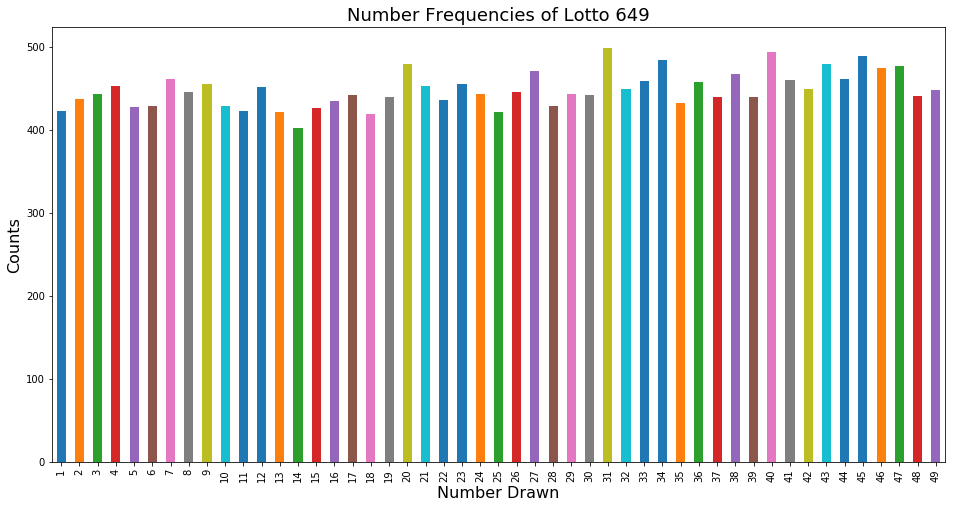

In [22]:
'''
Here we're simply making a plot of the number frequencies that we counted in the previous step.

'''

counts['sum_column'].plot(kind = 'bar', figsize = (16,8))
plt.xlabel("Number Drawn", size = 16)
plt.ylabel("Counts", size = 16)
plt.title("Number Frequencies of Lotto 649", size = 18)

From the above figure, it's clear that there isn't necessarily a _uniform_ distribution of lottery numbers. Of course, the question remains; are any numbers more _likely_ to be drawn in the lottery than others? If this was the case, it would be ideal to choose those numbers instead. 

Now, in the scope of the entire notebook, it appears that we did a lot of work to create the graph above. That is quite the contrary! In the cell below we've repeated all the code necessary to go from loading the data set to creating the number frequency histogram of Lotto 649. In fact, you'll find that ignoring white space and comments, only ten lines of code are needed to go from loading the data to creating a formatted graph.



In [44]:
# Below is all the code required to create the histogram of Lotto 649 number draws 
# Libraries
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

# Data loading/wrangling
lottery = pd.read_csv("data/649.csv")

cols = ['NUMBER DRAWN 1','NUMBER DRAWN 2','NUMBER DRAWN 3',
        'NUMBER DRAWN 4','NUMBER DRAWN 5','NUMBER DRAWN 6']
numbers = lottery[cols]

counts = numbers.apply(pd.value_counts)
counts["sum_column"] = counts.sum(axis=1)

# To create the plot again remove the '#' and trailing space from the four lines
# below. 

# counts['sum_column'].plot(kind = 'bar', figsize = (16,8))
# plt.xlabel("Number Drawn", size = 16)
# plt.ylabel("Counts", size = 16)
# plt.title("Number Frequencies of Lotto 649", size = 18)

## Conclusion

Hopefully this notebook has demystified how to incorporate open data within a Jupyter notebook. We have demonstrated the relative simplicity of loading data into an easy to work with data frame. Then using that dataframe to create and visualize summary statistics directly. Of course, this is only the beginning of any analysis. If you wanted to understand any "non-random anomalies", you would need to dive deeper into this data set. Perhaps perform a test of randomness such a chi-squared or the Kolmogorov-Smirnov test. You would try to find any numbers that appear to be "less random" than the others and use those as favorable picks in your own lottery picks. Certainly, it would be surprising if the lottery was subject to any bias, but discovering those possibilities is what working with open data is all about.


---

## Bonus

Below is a function called `lot` that will generate random lottery numbers for you. If you're feeling adventurous, try and create your own (simulated) data set of lottery numbers. You can use that synthetic data set to compare and contrast with the real data.  Or simply run the cell multiple times to generate as many combinations of potential lottery numbers as you'd like. 

In [6]:
import random
from IPython.display import clear_output
def lot(sort = True):
    # Create a list (the [] brackets) of your firstrandom lottery number
    choice = [float(random.randint(1,49))]
    
    # This is an infinite loop: be careful!
    while True:
        # Try to add a new number to our list provided it isn't already in 
        # our list
        new = float(random.randint(1,49))
        if new not in choice:
            # If it's a number we don't already have, add it to the list
            choice.append(new)
        
        # If we have 6 numbers, we can exit our infinite loop by returning
        # our lottery choices
        if len(choice) == 6:
            if sort:
                return sorted(choice)
            else:
                return choice

# This actually calls our function
lot()



[3.0, 5.0, 25.0, 29.0, 39.0, 47.0]

![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)